# Energy Efficiency Dataset Prediction project

### Problem Statement

**This project tackles the problem of predicting the energy efficiency of buildings based on various design parameters using machine learning models. The objective is to develop a predictive model that can estimate energy consumption and heating load of buildings, which can help architects and engineers in designing more energy-efficient buildings.**

### Dataset Overview

**Name**: Energy Efficiency

**link**: https://archive.ics.uci.edu/dataset/242/energy+efficiency

The dataset consists of 768 samples with 8 features and 2 real-valued responses:

**Features:**

1. Relative Compactness  
2. Surface Area  
3. Wall Area  
4. Roof Area  
5. Overall Height  
6. Orientation  
7. Glazing Area  
8. Glazing Area Distribution  

**Responses:**

1. Heating Load
2. Cooling Load

In [13]:
import pandas as pd

# Load the dataset
file_path = 'Users/ethan.gong/mnt/data/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 18, Finished, Available, Finished)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Distribution of Features

The distributions of features such as Relative Compactness, Surface Area, Wall Area, Roof Area, and others show varying degrees of normality and skewness.
Relative Compactness and Overall Height have relatively uniform distributions, while features like Wall Area and Roof Area show more concentrated distributions.

StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 23, Finished, Available, Finished)

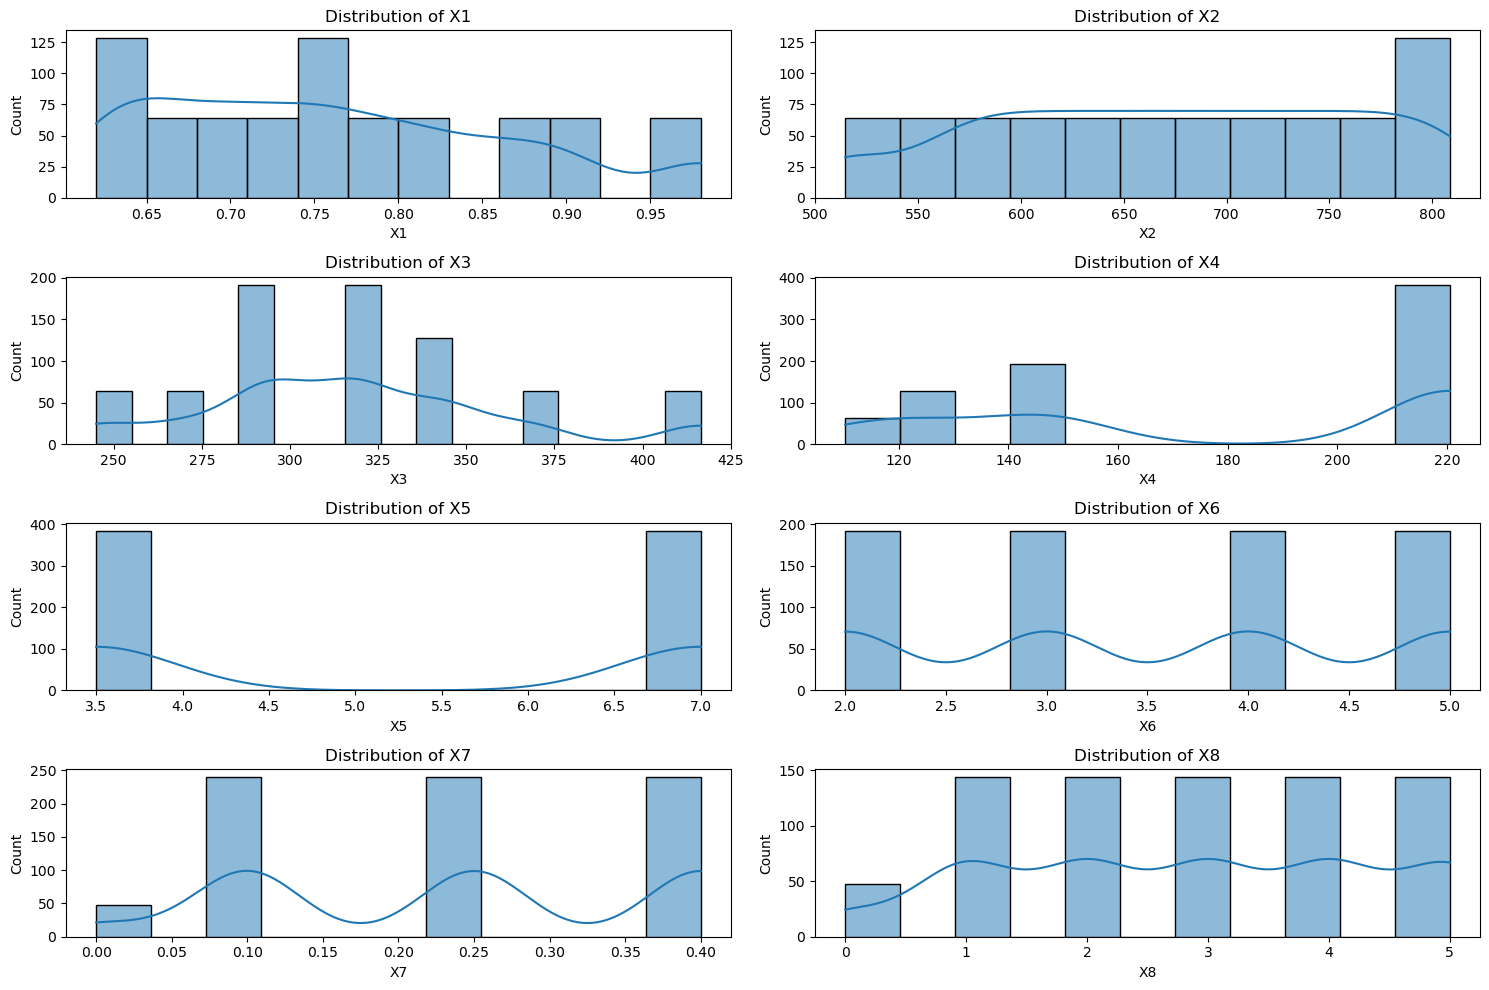

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the distribution of each feature
for i, column in enumerate(data.columns[:-2], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


#### Correlation Heatmap

There are strong correlations between some features. For instance, Surface Area (X2) and Wall Area (X3) are highly correlated, which makes sense as larger surface areas generally mean more wall area.
Both Heating Load (Y1) and Cooling Load (Y2) are positively correlated with each other.

StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 24, Finished, Available, Finished)

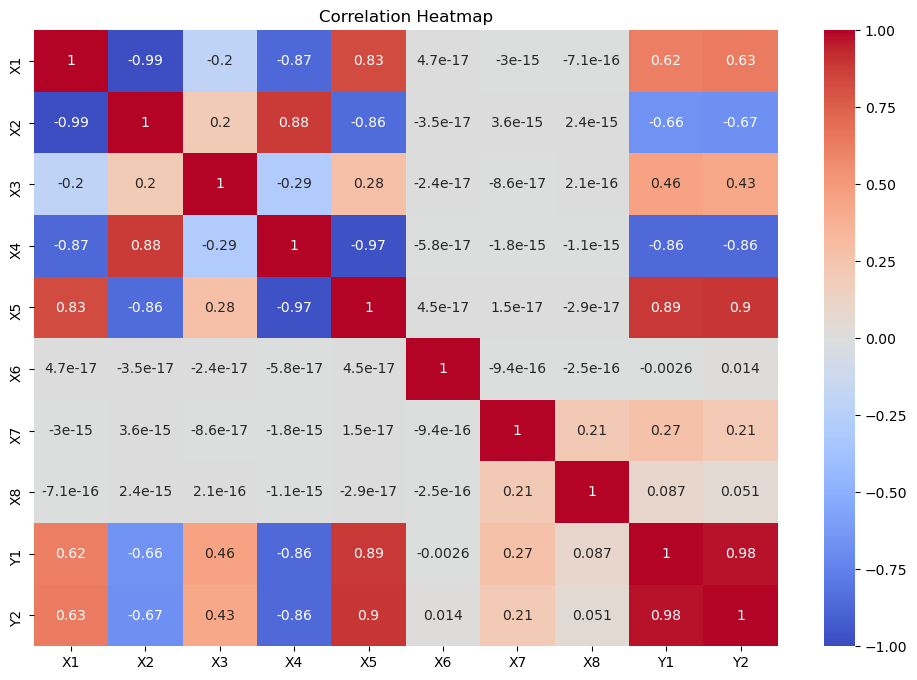

In [19]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


#### Pairplot for Selected Features

The pairplot highlights the relationships between some of the selected features and responses.
We can observe trends and patterns in the scatter plots, such as linear relationships and clustering.

StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 25, Finished, Available, Finished)

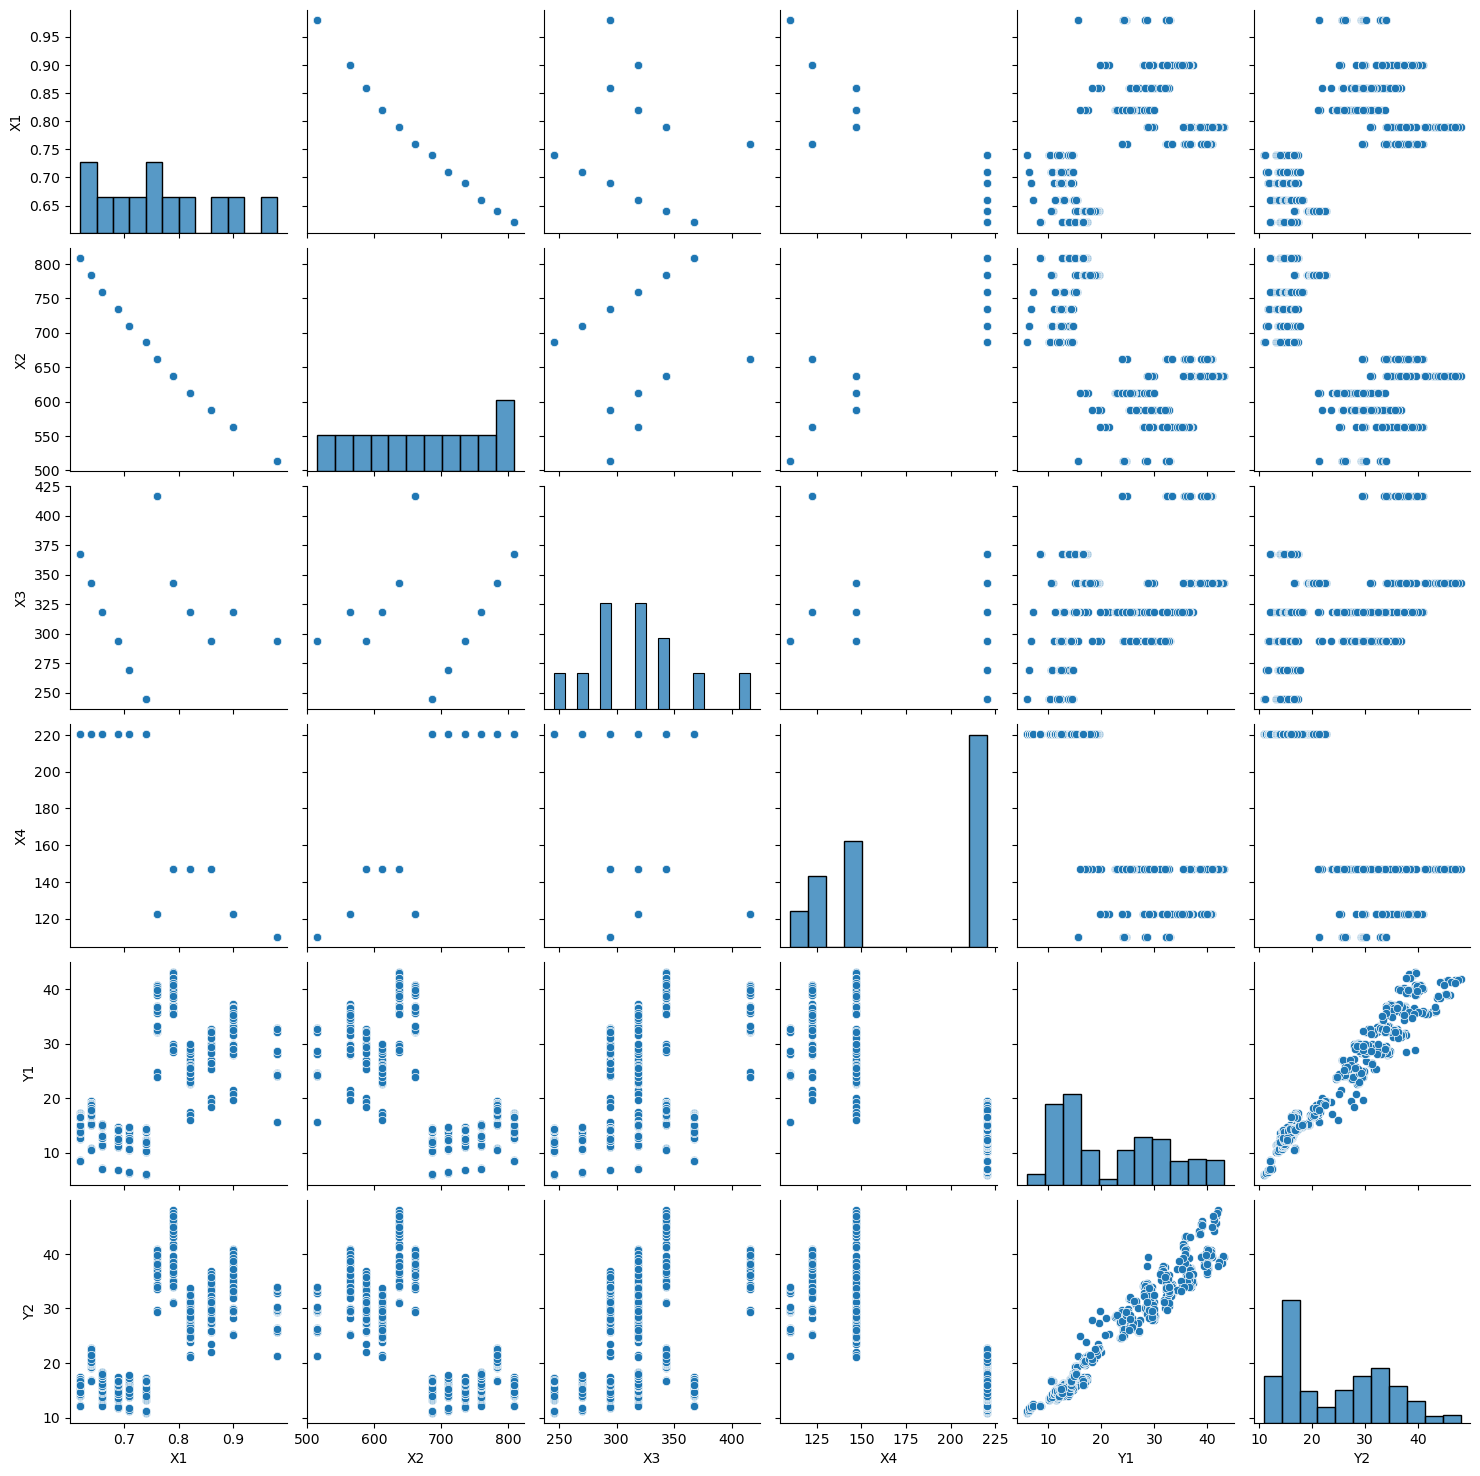

In [20]:
# Pairplot for selected features and responses
sns.pairplot(data[['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2']])
plt.show()


#### Boxplot of Heating Load and Cooling Load by Orientation

The boxplots show the distribution of Heating Load (Y1) and Cooling Load (Y2) for each orientation.
Certain orientations show wider distributions for heating and cooling loads, indicating that orientation can significantly impact energy efficiency.

StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 26, Finished, Available, Finished)

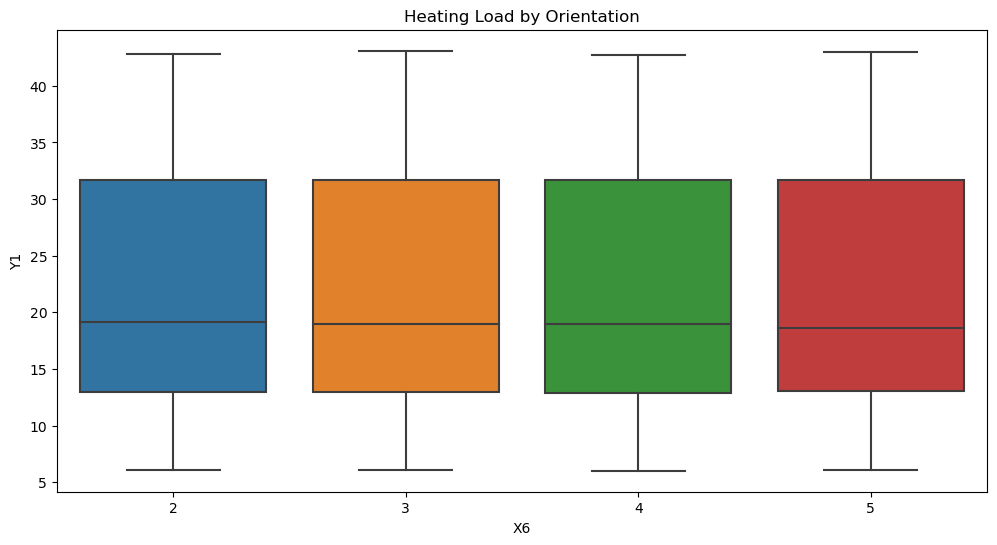

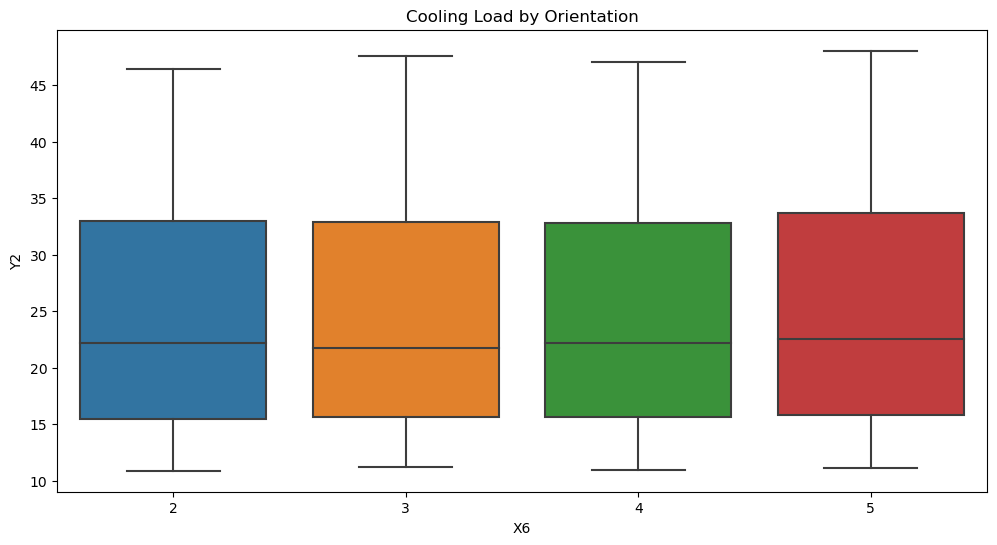

In [21]:
# Boxplot of Heating Load by Orientation
plt.figure(figsize=(12, 6))
sns.boxplot(x='X6', y='Y1', data=data)
plt.title('Heating Load by Orientation')
plt.show()

# Boxplot of Cooling Load by Orientation
plt.figure(figsize=(12, 6))
sns.boxplot(x='X6', y='Y2', data=data)
plt.title('Cooling Load by Orientation')
plt.show()


#### Scatter Plot of Heating Load vs. Cooling Load

This scatter plot reveals a positive correlation between Heating Load and Cooling Load, indicating that buildings with higher heating loads also tend to have higher cooling loads.

StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 27, Finished, Available, Finished)

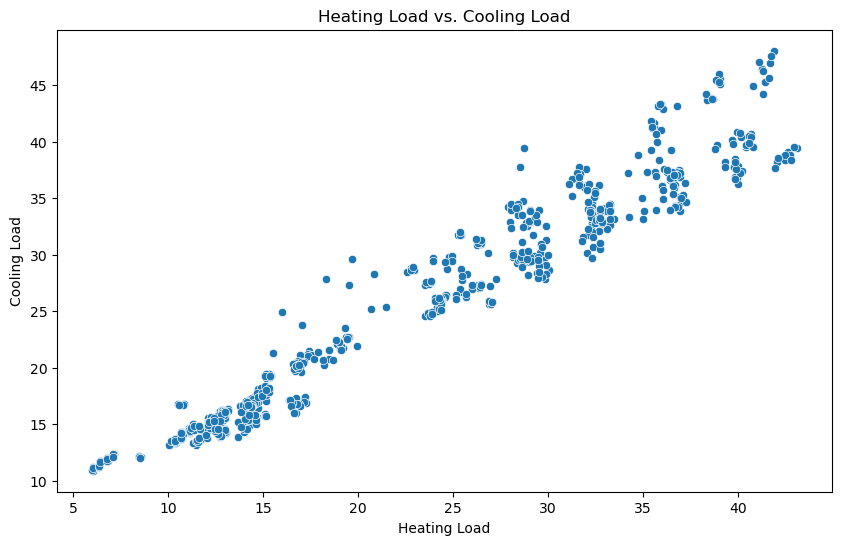

In [22]:
# Scatter plot of Heating Load vs. Cooling Load
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Y1', y='Y2', data=data)
plt.title('Heating Load vs. Cooling Load')
plt.xlabel('Heating Load')
plt.ylabel('Cooling Load')
plt.show()


### Data Cleaning and Pre-processing

Before proceeding to model implementation, we'll clean and pre-process the data.

1. **Handling Missing Values**:  
Check for and handle any missing values (if any).
2. **Normalization**:

  Normalize the numerical features to ensure that they contribute equally to the model performance.
3. **Encoding Categorical Variables**:

  Encode any categorical variables (in this case, Orientation) if needed.

In [23]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = data.isnull().sum()

# Normalize numerical features
scaler = StandardScaler()
numerical_features = data.columns[:-2]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the cleaned and normalized dataset
data_cleaned = data.head()

missing_values, data_cleaned


StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 28, Finished, Available, Finished)

(X1    0
 X2    0
 X3    0
 X4    0
 X5    0
 X6    0
 X7    0
 X8    0
 Y1    0
 Y2    0
 dtype: int64,
          X1        X2        X3        X4   X5        X6        X7        X8  \
 0  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.341641 -1.760447 -1.814575   
 1  2.041777 -1.785875 -0.561951 -1.470077  1.0 -0.447214 -1.760447 -1.814575   
 2  2.041777 -1.785875 -0.561951 -1.470077  1.0  0.447214 -1.760447 -1.814575   
 3  2.041777 -1.785875 -0.561951 -1.470077  1.0  1.341641 -1.760447 -1.814575   
 4  1.284979 -1.229239  0.000000 -1.198678  1.0 -1.341641 -1.760447 -1.814575   
 
       Y1     Y2  
 0  15.55  21.33  
 1  15.55  21.33  
 2  15.55  21.33  
 3  15.55  21.33  
 4  20.84  28.28  )

Missing Values: There are no missing values in the dataset.  
Normalization: The numerical features have been normalized using StandardScaler.

### ML model 1: Linear Regression

**why**: Simple and effective for regression problems, suitable for interpreting relationships between the variables.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = data.drop(columns=['Y1', 'Y2'])
y_heating = data['Y1']
y_cooling = data['Y2']

X_train, X_test, y_heating_train, y_heating_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_cooling_train, y_cooling_test = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model_heating = LinearRegression()
lr_model_heating.fit(X_train, y_heating_train)

lr_model_cooling = LinearRegression()
lr_model_cooling.fit(X_train, y_cooling_train)

# Make predictions
y_heating_pred = lr_model_heating.predict(X_test)
y_cooling_pred = lr_model_cooling.predict(X_test)

# Evaluate the model
heating_rmse = mean_squared_error(y_heating_test, y_heating_pred, squared=False)
heating_r2 = r2_score(y_heating_test, y_heating_pred)

cooling_rmse = mean_squared_error(y_cooling_test, y_cooling_pred, squared=False)
cooling_r2 = r2_score(y_cooling_test, y_cooling_pred)

(heating_rmse, heating_r2), (cooling_rmse, cooling_r2)


StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 29, Finished, Available, Finished)

((3.0254268535103725, 0.9121846294352438),
 (3.1453819558114193, 0.8932255268607289))

#### Linear Regression Model Results
**Heating Load** (Y1):

RMSE: 3.02  
R²: 0.91  

**Cooling Load** (Y2):

RMSE: 3.14  
R²: 0.89

### ML model 2: Random Forest Regressor

**why**: A more complex model that can capture non-linear relationships and interactions between features.

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_heating.fit(X_train, y_heating_train)

rf_model_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_cooling.fit(X_train, y_cooling_train)

# Make predictions
y_heating_pred_rf = rf_model_heating.predict(X_test)
y_cooling_pred_rf = rf_model_cooling.predict(X_test)

# Evaluate the model
heating_rmse_rf = mean_squared_error(y_heating_test, y_heating_pred_rf, squared=False)
heating_r2_rf = r2_score(y_heating_test, y_heating_pred_rf)

cooling_rmse_rf = mean_squared_error(y_cooling_test, y_cooling_pred_rf, squared=False)
cooling_r2_rf = r2_score(y_cooling_test, y_cooling_pred_rf)

(heating_rmse_rf, heating_r2_rf), (cooling_rmse_rf, cooling_r2_rf)


StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 30, Finished, Available, Finished)

((0.4943968899631081, 0.9976549684835138),
 (1.7410188896794823, 0.9672864540640289))

#### Random Forest Regressor Model Results
**Heating Load** (Y1):

RMSE: 0.49  
R²: 0.99  

**Cooling Load** (Y2):

RMSE: 1.74  
R²: 0.97

In [27]:
import pandas as pd

# Results for Linear Regression
linear_regression_results = {
    'Metric': ['RMSE', 'R²'],
    'Heating Load (Linear Regression)': [3.02, 0.91],
    'Cooling Load (Linear Regression)': [3.14, 0.89]
}

# Results for Random Forest Regressor
random_forest_results = {
    'Metric': ['RMSE', 'R²'],
    'Heating Load (Random Forest)': [0.49, 0.99],
    'Cooling Load (Random Forest)': [1.74, 0.97]
}

# Convert to DataFrames
linear_regression_df = pd.DataFrame(linear_regression_results)
random_forest_df = pd.DataFrame(random_forest_results)

# Merge the DataFrames for comparison
comparison_df = pd.merge(linear_regression_df, random_forest_df, on='Metric')

# Display the comparison table
comparison_df



StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 0, 32, Finished, Available, Finished)

,Metric,Heating Load (Linear Regression),Cooling Load (Linear Regression),Heating Load (Random Forest),Cooling Load (Random Forest)
0,RMSE,3.02,3.14,0.49,1.74
1,R²,0.91,0.89,0.99,0.97


**Explanation of Results**  
Linear Regression:  
Provides a good fit with high R² values and moderate RMSE for both heating and cooling loads.
Simpler model, easier to interpret, but may not capture complex patterns.  

Random Forest Regressor:  
Significantly lower RMSE and higher R² values, indicating a much better fit.
More complex model, better at capturing non-linear relationships and interactions between features.  

**Conclusion**  
The Random Forest Regressor outperforms Linear Regression in predicting both Heating Load and Cooling Load.
For energy efficiency prediction in buildings, using a Random Forest Regressor would be more effective due to its ability to handle complex patterns in the data.

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'Users/ethan.gong/mnt/data/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Save as CSV
csv_file_path = 'Users/ethan.gong/mnt/data/ENB2012_data.csv'
data.to_csv(csv_file_path, index=False)


StatementMeta(8937903e-590e-4fc7-9d3e-425192acb709, 1, 6, Finished, Available, Finished)